# Regression - Chemical examples workbook

### Introduction

This notebook will take you through some regression examples with some recently published data so you can see how regression works and demonstrate how you use might regression in actual wet chemistry research.

You will learn how to do regression in python, about linear, multivariate, polynomial and ridge regression and a little about cellulose dissolution.

Cellulose is made of repeating units of cellubiose (shown Fig. 1 left), it's very hard to dissolve (recalcitrant), afterall it is a main component of trees, and must be dissolved in **ionic liquids** (IL). Ionic liquids are interesting materials: they are salts that are in a liquid state at room temperature. The ionic liquid used in this work is 1-Ethyl-3-methylimidazolium acetate [EMim]$^+$[[OAc]$^-$, shown around the cellubiose repeat unit (Fig. 1 left). 

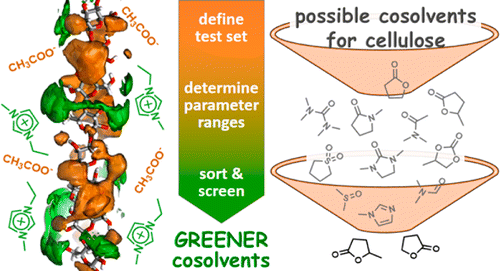

Fig. 1. Graphical abstract from paper 1. Left: a cellubiose residue surrounded by a [Emim][OAc] ionic liquid solvent shell; orange: location of [OAc]$^-$ ions; green location of [EMim]$^+$ ions. Right: the 11 co-solvents that were investigated in this work, and the 2 new ones that were identified.

**The chemical problem** Cellulose is a readily available material that can be used to make useful biodegradable materials from waste materials (like bagasse, the husks of sugar cane left over after processing). However the first stage of processing is to dissolve cellulose which is very difficult. Currently, liquid salts called *ionic liquids* (IL) are used to do this (which are nice solvents in terms of green chemistry as they have no vapour pressure so can be recovered, but they are horrible solvents to handle). Ionic liquids are (very!)  expensive, and the resulting cellubiose-ionic liquid mixture is very thick and hard to process. The solution to both these problems is to dilute the ionic liquid with a *co-solvent* (CS), and the mixture of ionic liquid and co solvent is called an *organic electrolyte solutions* (OES). 

In this notebook, we will look at data which will help us figure out which CS are the best and why. Any small improvement in cellulose processing is worth billions of dollars due to increasing the efficiency of the paper and biodegradable plastics industries. Furthermore, this work can be used to switch co-solvents for safer or greener options.

**Materials**
1-Ethyl-3-methylimidazolium acetate (>95% purity, Sigma-Aldrich) and microcrystalline cellulose (Sigma-Aldrich, 20 μm particle size) were dried at 80 °C under reduced pressure to constant mass. Dipolar aprotic solvents (all >99% purity, Sigma-Aldrich) were used as received, except for sulfolane, which was dried over activated 3 Å molecular sieves. The water content of the ionic liquid and solvents was measured by Karl Fisher titration and found to be: [EMIm][OAc] 1.1%; 1-methylimidazole 0.2%; dimethyl sulfoxide 1.1%; N,N-dimethylformamide 0.3%; N,N′-dimethylimidazolidinone 0.7%; N,N-dimethylacetamide 0.4%; sulfolane 0.1%; propylene carbonate 0.1%; γ-valerolactone 0.8%; N,N,N′,N′-tetramethylurea 0.3%; N-methylpyrrolidinone 0.8%; and γ-butyrolactone 0.3%.

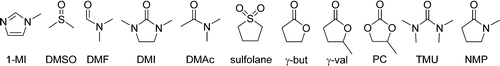

Fig. 2. Co-solvents (CS) used in organic electrolyte solutions (OES).

**Solubility Tests**
Solubility tests were conducted at 70 °C. As the cellulose solutions formed are viscous and not amenable to filtration, solubility was determined by addition of small aliquots of dried microcrystalline cellulose (MC) to mixtures of [EMIm][OAc]/cosolvent of appropriate composition. The maximum amount of MC that dissolved, a, and minimum amount that did not dissolve, b, were recorded, giving an under- and overestimate for the maximum amount of MC dissolvable, v. Repeated determinations, using smaller incremental added weights of MC then led to a narrow range between “soluble” and “insoluble”. (As MC tended to form aggregates when added directly to OESs, a slightly modified procedure was followed once approximate solubility values were known at any given OES composition: to a weighed quantity of dried MC was added a measured quantity of the selected cosolvent; after stirring for 1 min to wet and disperse the MC powder, calculated quantities of IL were added, and then, small, weighed aliquots were added until no further MC would dissolve.) Apparently “insoluble” samples were maintained for a minimum of 16 h at 70 °C to confirm the lack of further dissolution.
Each pair of points (ai, bi) was given a weight, wi,:
(1)
based on, vi, the errors on ai and bi, as given by vi = (bi– ai)/2, such that the uncertainties on points ai and bi are ai+ vi and bi– vi respectively. Other sources of error are much smaller in comparison.

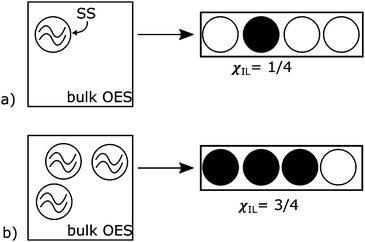

Fig 3. An explanation of mole fraction. Cellubiose is surrounded by a solvent shell (SS). There is only so much cellulose that can fit into the OES. We normalise this data such that the maximum amount of cellubiose that can be dissolved (in pure ionic liquid) is 1. Note that in this cartoon system only 4 units of cellubiose can be dissolved.

The mole fraction of ionic liquid in the OES mixture, $\chi_{IL}$, is calculated for each mixture ($\chi_{IL}=1$ is pure ionic liquid, $\chi_{IL}=0$ is pure co-sovlent. The weight percentage of dissolved cellulose was measured: literally very small amounts of nanocrystalling cellulose was weighed out very carefully and put into the OES to see if it dissolved. You'll notice that there appears to be over and under points, the lower values are the last measurement of cellulose that dissolved, the higher values are the first measurement that did not dissolve. These experiments were very fiddly and time consuming to do, so we must respect the data (and the hardworking PhD student who did these experiments!). 

From the weight percentage, the mole fraction of the cellubiose repeat unit, $\chi_{cell}$ was calculated to get the plots below.[1]

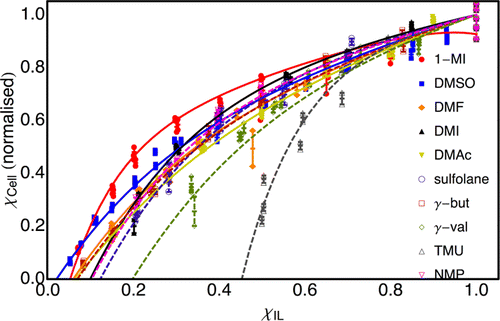

Fig. 4 Cellulose-OES dissolution curves.  

**Things to note:**

* Most the curves seem to have roughly the same sort of shape
* Some curves look a little different to the rest, look at the shape of 1-MI
* The point where these curves cross the x-axis is the molar fraction of solvent required before any of the cellulose will dissolve. An ionic liquid-DMSO OES only requires about 0.08 or 8% by mole of ionic liquid for some of the cellulose to be dissolved, whereas TMU requires ~0.48 (48% by mole) of ionic liquid before any cellulsoe will dissolve. *What is the cause of this difference?* 

**The Task**

We're going to try and understand which aspects of the co-solvents causes this different behaviour, fit the curves and come up with a models for the typical OESs (like DMI) and the atypical OESs (like 1-MI).

**References for this data:**

[1] Ella Gale, Remigius H. Wirawan, Rodrigo L. Silveira, Caroline S. Pereira, Marcus A. Johns, Munir S. Skaf and Janet L. Scott, "Directed Discovery of Greener Cosolvents: New Cosolvents for Use in Ionic Liquid Based Organic Electrolyte Solutions for Cellulose Dissolution," *ACS Sustainable Chem. Eng.*, 2016, **4**, 11, 6200--6207
Publication Date:September 28, 2016
https://doi.org/10.1021/acssuschemeng.6b02020

[2] Gale, E. M., Johns, M. A., Wirawan, R. H., & Scott, J. L. (2017). "Combining random walk and regression models to understand solvation in multi-component solvent systems." *Physical Chemistry Chemical Physics*, **19**(27), 17805-17815. https://doi.org/10.1039/c7cp02873c

## Contents

1.	Investigation of the data
    * 1.1	Plotting cellulose dissolution data
    * 1.2	Linear regression on the efficiency data
2.	Non-linear fitting, comparing linear and higher order fits on the minimum chi_IL data
3.	Linear fitting exercises
4.	Multivariate Linear Regression: building models for the maximum efficiency of OES from co-solvent features.
5.	Multi-polynomial regression to fit the cellulose dissolution curves
6.	Ridge regression – fitting and plotting volume fractions



In [1]:
# first we import some useful libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## 1. Investigation of the data

Before trying to analyse data, it is a good idea to have a look at it.

### 1.1 Plotting cellulose dissolution curves

In [2]:
# This sets up a list of strings which are the names of our solvents
SolventNameList = ["1MI", "DMSO", "DMF", "DMI", "DMAc", "sulfolane", "gbut", "gval", "TMU", "NMP", "PC"]

In [3]:
# read data into a DataFrame
chi1MI = pd.read_csv("./tutorialdata/chichi1MI.csv")
chiDMSO = pd.read_csv("./tutorialdata/chichiDMSO.csv")
chiDMF = pd.read_csv("./tutorialdata/chichiDMF.csv")
chiDMI = pd.read_csv("./tutorialdata/chichiDMI.csv")
chiDMAc = pd.read_csv("./tutorialdata/chichiDMAc.csv")
chisulfolane = pd.read_csv("./tutorialdata/chichisulfolane.csv")
chigbut = pd.read_csv("./tutorialdata/chichigbut.csv")
chigval = pd.read_csv("./tutorialdata/chichigval.csv")
chiTMU = pd.read_csv("./tutorialdata/chichiTMU.csv")
chiNMP = pd.read_csv("./tutorialdata/chichiNMP.csv")
chiPC = pd.read_csv("./tutorialdata/chichiPC.csv")

### Put the data into a DataFrame

*Advanced coding skillz!* I'm bored of typing in all the commands for each solvent as I did above.  You may have noticed that the 11 lines of code above only differ by the solvent names. We could copy the line to make c1MI and just fill in the solvents by hand, but that's boring. So, instead we'll autogenerate the commands by adding togther strings and then use `exec` for execute to run them. This allows us to write computer code that writes computer code! :) 

Don't worry if you do not understand this bit, I'm just using this to set up the data. 

### Setting up several dataframes

This code sets up the DataFrames. Just run this bit, don't worry about understanding it right now. 

In [4]:
for i in range(len(SolventNameList)):
    my_string =  "c" + SolventNameList[i] + " = pd.DataFrame(chi" + SolventNameList[i] + ")"
    print(my_string)
    exec(my_string)

c1MI = pd.DataFrame(chi1MI)
cDMSO = pd.DataFrame(chiDMSO)
cDMF = pd.DataFrame(chiDMF)
cDMI = pd.DataFrame(chiDMI)
cDMAc = pd.DataFrame(chiDMAc)
csulfolane = pd.DataFrame(chisulfolane)
cgbut = pd.DataFrame(chigbut)
cgval = pd.DataFrame(chigval)
cTMU = pd.DataFrame(chiTMU)
cNMP = pd.DataFrame(chiNMP)
cPC = pd.DataFrame(chiPC)


Let's have a look at one of the datasets

In [5]:
chi1MI.head()

,chi_IL,chi_cell
0,0.069929,0.098819
1,0.070851,0.100230
2,0.150636,0.322374
3,0.152858,0.312512
4,0.151703,0.333593


Now, let's plot and eyeball the data.

<AxesSubplot:xlabel='chi_IL', ylabel='chi_cell'>

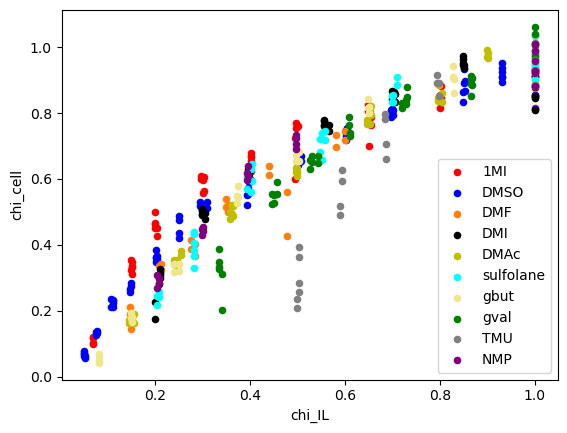

In [6]:
# This code plots the chi-chi curves for each dataset.
ax=chi1MI.plot.scatter("chi_IL","chi_cell", c='r', label='1MI')
chiDMSO.plot.scatter("chi_IL","chi_cell", c='b', ax=ax, label='DMSO')
chiDMF.plot.scatter("chi_IL","chi_cell", c='tab:orange', ax=ax, label='DMF')
chiDMI.plot.scatter("chi_IL","chi_cell", c='k', ax=ax, label='DMI')
chiDMAc.plot.scatter("chi_IL","chi_cell", c='y', ax=ax, label='DMAc')
chisulfolane.plot.scatter("chi_IL","chi_cell", c='cyan', ax=ax, label='sulfolane')
chigbut.plot.scatter("chi_IL","chi_cell", c='khaki', ax=ax, label='gbut')
chigval.plot.scatter("chi_IL","chi_cell", c='g', ax=ax, label='gval')
chiTMU.plot.scatter("chi_IL","chi_cell", c='gray', ax=ax, label='TMU')
chiNMP.plot.scatter("chi_IL","chi_cell", c='purple', ax=ax, label='NMP')

Messy! Lets just plot the typical curves

<AxesSubplot:xlabel='chi_IL', ylabel='chi_cell'>

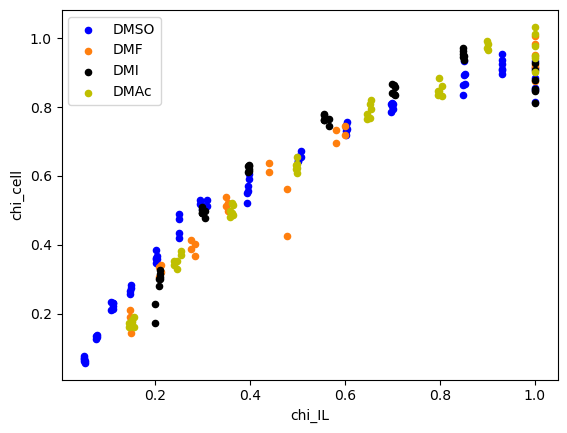

In [7]:
ax=chiDMSO.plot.scatter("chi_IL","chi_cell", c='b', label='DMSO')
chiDMF.plot.scatter("chi_IL","chi_cell", c='tab:orange', ax=ax, label='DMF')
chiDMI.plot.scatter("chi_IL","chi_cell", c='k', ax=ax, label='DMI')
chiDMAc.plot.scatter("chi_IL","chi_cell", c='y', ax=ax, label='DMAc')

At the moment, the different OES systems look vastly different. They cross the x-axis in different places, i.e. the different systems require more ionic liquid to start dissolving the cellulose, the curves also have different shapes and curvature.

If we are able to understand these systems and explain what is happening here, we should have the knowledge to replot these data such that all the OES's overlap, and then the best fit line to that would be the explanation for why the different co-solvents cause different behaviour. And from that, we should be able to predict other solvents and other systems. 

### 1.2 Linear regression on the efficiency data

We want to try and find out which chemical characteristics of the solvents could explain this behaviour. Before fitting the lines, lets look at the behaviour of the OESs as a series. These rough measures can then be screened against several chemical characteristics to see which ones might be involved in explaining the different between the cosolvents (section 4), but first lets see how the efficiency measures relate to themselves (a standard thing in data science is to start with data exploration). Note, for this exercise, we're only doing the first 10 solvents (excluding PC). 

There are a couple of limiting quantities found for these OESs.
* `min_chi_IL` is where the curves above cross the x-axis, i.e. the minimum amount of IL required to get any dissolution at all
* `max_efficiency measure`: greatest mass of of cellulose dissolved per unit mass of IL, i.e. the efficiency of the best OES mixture
* `chi_IL_max_efficieny` which is the $\chi_{IL}$ required in the best OES mixture for that co-solvent. This is the point where the largest amount of cellulose is being dissolved for the each mole IL (i.e. the point you'd want to run your processes at as you're getting the most for your money).


In [8]:
# Limiting quantities for the OES curves (copied from table 1 in [1])
max_efficiency = np.array([0.168,0.160,0.284,0.333,0.349,0.399,0.318,0.609,0.752,0.344])
min_chi_IL = np.array([0.052, 0.019,0.058,0.096,0.056,0.115,0.065,0.184,0.451,0.100])
chi_IL_max_efficiency = np.array([0.168, 0.160,0.284,0.333,0.349,0.399,0.318,0.609,0.752,0.344])

### Put the data into a DataFrame

In [9]:
efficiency={'max_efficiency': max_efficiency, 'min_chi_IL': min_chi_IL, 'chi_IL_max_efficiency': chi_IL_max_efficiency }

In [10]:
# Create pandas dataframe to store our X and y values
eff = pd.DataFrame(efficiency)

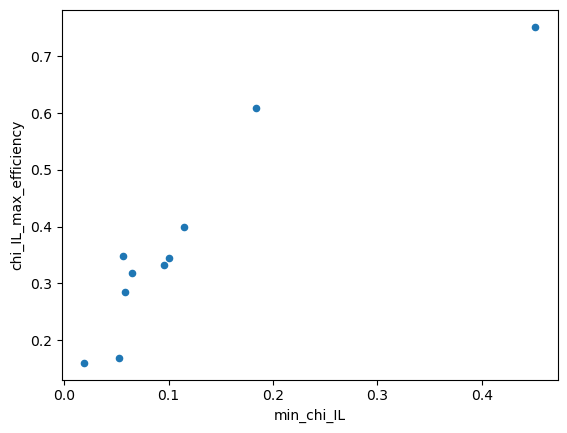

In [11]:
ax=eff.plot.scatter("min_chi_IL","chi_IL_max_efficiency")

Let's make a model and call it `min_max_eff` and set it up to do linear regression

In [12]:
# btw, fit_intercept is a parameter to tell the model that we want an intercept fitted
min_max_eff = LinearRegression(fit_intercept=True)

Now fit the model

In [13]:
min_max_eff.fit(eff[["min_chi_IL"]], eff[["chi_IL_max_efficiency"]])

LinearRegression()

C:\ProgramData\Anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


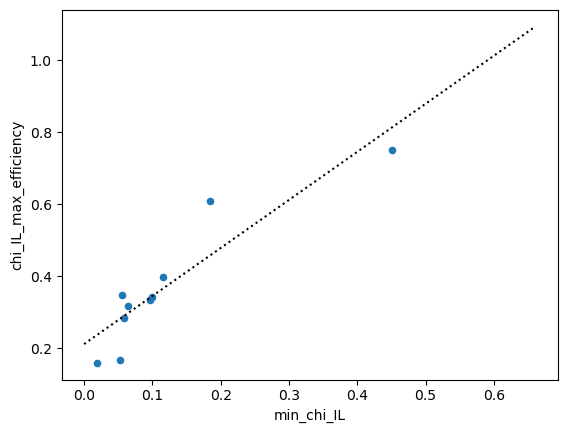

In [14]:
xfit = np.linspace(0, 0.66)
yfit = min_max_eff.predict(xfit[:, np.newaxis])

ax = eff.plot.scatter("min_chi_IL", "chi_IL_max_efficiency")
ax.plot(xfit, yfit, linestyle=":", color="black")

In [15]:
print("Model gradient: ", min_max_eff.coef_[0])
print("Model intercept:", min_max_eff.intercept_)

Model gradient:  [1.33495341]
Model intercept: [0.21193957]


In [16]:
min_max_eff.score(eff[["min_chi_IL"]], eff["chi_IL_max_efficiency"])

0.8305600824319894

So, the `min_chi_IL` is roughly positively correlated with the maximum efficiency, which, as `min_chi_IL` is the crossing point and maximum efficiency is the area under the curve, and the curves are roughly a similar shape makes sense. 

Ok, now lets see how if the other limiting quantities of OES vary with respect to each other. 

**Exercise: Fit 'max_efficiency' and "chi_IL_max_efficiency"**

C:\ProgramData\Anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


1.0

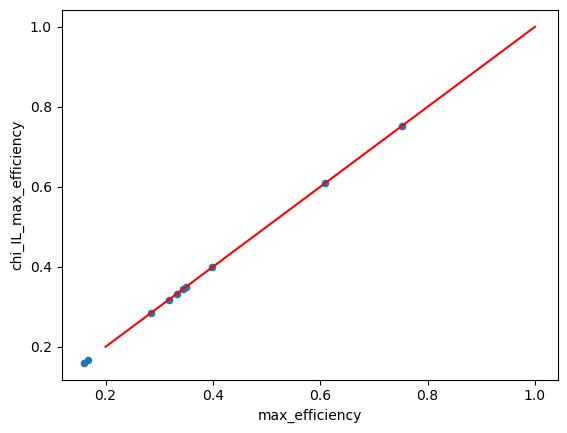

In [24]:
maxeff_chi_max = LinearRegression(fit_intercept = True)

maxeff_chi_max.fit(eff[['max_efficiency']], eff['chi_IL_max_efficiency'])

new_x = np.linspace(0.2, 1).reshape(-1,1)
new_y = maxeff_chi_max.predict(new_x)


ax = eff.plot.scatter("max_efficiency", "chi_IL_max_efficiency")
ax.plot(new_x, new_y, 'r-')

maxeff_chi_max.score(eff[['max_efficiency']], eff['chi_IL_max_efficiency'])


**Exercise: Fit"min_chi_IL" and 'max_efficiency'**

C:\ProgramData\Anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


1.0

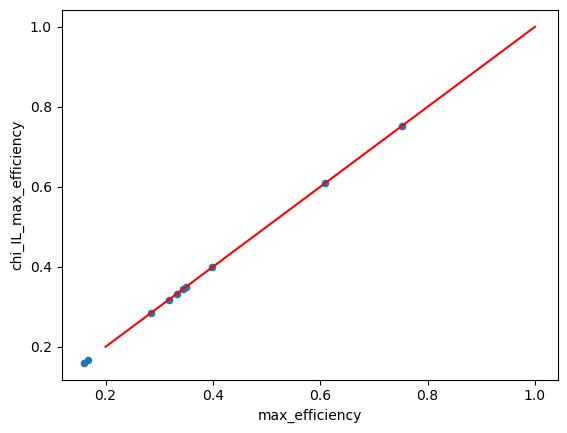

In [25]:
min_chi_max_eff = LinearRegression(fit_intercept = True)

min_chi_max_eff.fit(eff[['max_efficiency']], eff['chi_IL_max_efficiency'])

new_x = np.linspace(0.2, 1).reshape(-1,1)
new_y = min_chi_max_eff.predict(new_x)


ax = eff.plot.scatter("max_efficiency", "chi_IL_max_efficiency")
ax.plot(new_x, new_y, 'r-')

min_chi_max_eff.score(eff[['max_efficiency']], eff['chi_IL_max_efficiency'])

So what have you found? 

The max efficiency measure is entirely explained by the $\chi_{IL}$ max efficiency. How good the OES is at dissolving cellulose at the most efficient point is entirely determined by the amount of IL in that mixture, i.e. the co-solvents are not aiding the disslution chemically, which we expect (and knew writing the paper) as it is only the IL that does the dissolution. 

Clearly, comparison of the OESs on the basis of mole fraction IL required to effect dissolution of a given quantity of cellulose suggests that some solvents, notably 1-MI, DMSO, DMF, etc., are “good” cosolvents, while others, such as TMU, are significantly less effective. In general, the IL will be the most costly (and sometimes the least green) component of the OES, so we consider a measure of the efficiency of IL use in MC dissolution. Differences between the relative efficacies of the solvents are starkly highlighted, with 1-MI yielding the greatest mass of cellulose dissolved per unit mass of IL. DMSO follows a close second, while DMF, DMAc, NMP, sulfolane, and DMI are similar, Table 1. TMU, in spite of its significant structural similarity to DMI, is the poorest solvent tested using the efficiency measure. 

Interestingly, the most efficient IL cosolvent, 1-MI, is not the solvent with the lowest limiting χIL required to effect dissolution of MC. Indeed, there are clues that 1-MI might be distinct from the other solvents as the shape of the curve reflecting quantity of cellulose dissolved versus IL concentration does not match that of all other solvents tested, possibly pointing to some mechanistic peculiarity. 

Now, what we want to explain is what it is about the co-solvents that determines the `chi_max_efficiency`, as this the value we care about. We can see from the data that our best two solvents are DMSO and 1-MI and our worst two are g-val and TMU. 

# 2. Non-linear fitting, comparing linear and higher order fits on the minimum $\chi_{IL}$ data

One thing that varies about this curve is the point at which the cellulose starts to dissolve, i.e. where it crosses the x-axis (and we know from section 1 that this is positively correlcated with the maximum efficiency). This is the minimum mole fraction of ionic liquid required to get any dissolution at all. So, different co-solvents require different amounts of IL in the mixture to do anything at all. For example, TMU is a bad co-solvent, DMI is a good one.

Looking at the chemical structures, we can see that TMU is not a ring, and had 4 methyl groups that can spin and pivot around taking up space. DMI is the ring version of TMU, and being a ring the methyl and CH$_2$ groups hydrogens are much more constrained. Note also that the other very good co-solvents are 1-MI and DMSO are small molecules.

Perhaps the different behaviour of the OESs is related to the volume of the co-solvents?

To find out we take as our input is the minimum ionic liquid molar fraction $\chi_{IL}$ , called `chiIL_min` below. Our target output is the molar volume of the co-solvent (`vol_m` below), which is a value we can look up. 

This is the data:

In [26]:
vol_m = np.array([71.3, 82.4, 107.3, 122.6, 96.44, 76.8, 82.63, 
  95.27, 93.02, 96.2, 85.])
chiIL_min = np.array([0.026125, 0.046998, 0.136876, 
  0.413974, 0.04399, 0.04875, 
  0.05349, 0.0675487, 0.07219, 
  0.13881,0.1341])

### Put the data into a DataFrame

In [27]:
data={'molar volume': vol_m, 'minimum chi ionic liquid': chiIL_min}

In [28]:
# Create pandas dataframe to store our X and y values
df = pd.DataFrame(data)

In [29]:
# Show the first five rows of our dataframe
df.head()

,molar volume,minimum chi ionic liquid
0,71.30,0.026125
1,82.40,0.046998
2,107.30,0.136876
3,122.60,0.413974
4,96.44,0.043990


### Plot the data

<AxesSubplot:xlabel='molar volume', ylabel='minimum chi ionic liquid'>

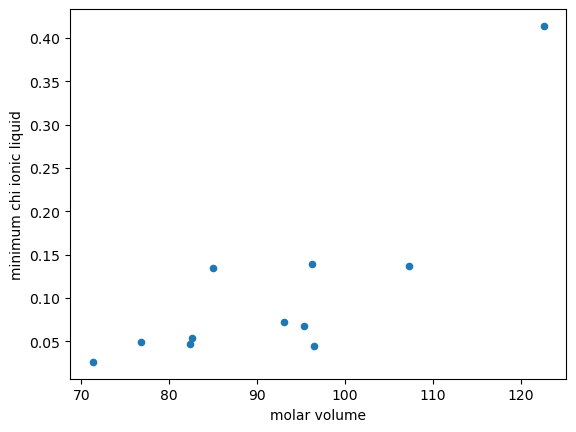

In [30]:
df.plot.scatter("molar volume", "minimum chi ionic liquid")

*Now the question is is this best fit by a straight line or a curve?*

### Fit the data to a straight line and get the residuals

In [31]:
# instantiate the model
model = LinearRegression(fit_intercept=True)
# set up fit the model to the data
model.fit(df[["molar volume"]], df["minimum chi ionic liquid"])
# set up x
xfit = np.linspace(70, 130)
# predict y
yfit = model.predict(xfit[:, np.newaxis])

C:\ProgramData\Anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### Plot the fit

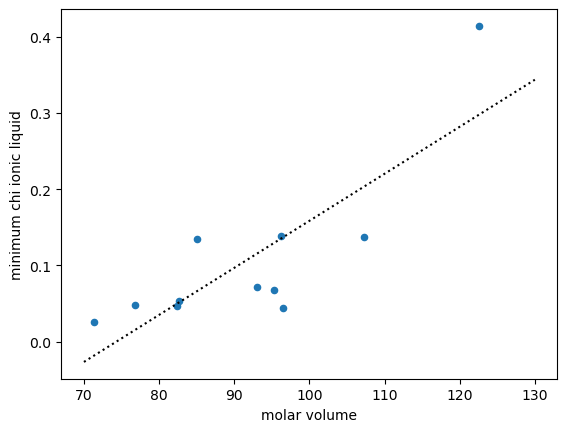

In [32]:
ax = df.plot.scatter("molar volume", "minimum chi ionic liquid")
ax.plot(xfit, yfit, linestyle=":", color="black")

### Get the R2 value and set it equal to R2linear

In [33]:
R2linear = model.score(df[["molar volume"]], df["minimum chi ionic liquid"])

In [34]:
print("R2 for the linear fit is: {}".format(R2linear))

R2 for the linear fit is: 0.667158778296471


Now, lets try fitting the data to a curve. To do this we need to use `PolynomialFeatures` as below. The number is the maximum order of the polynomial allowed, i.e. in this case we are fitting the data to the equation $y = m x^2 + c$

### Fit the data to a curve line and get the residuals

In [35]:
# To allow linear regression to use powers of the inputes, we must make a pipeline to put the polynomial features into the model
# Note that this is still linear regression as the parameters have a linear relationship to the input data
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
# fit the model
poly_model.fit(df[["molar volume"]],df["minimum chi ionic liquid"])
# get sample x values
xfit = np.linspace(70, 130)
# predict y
yfit = poly_model.predict(xfit[:, np.newaxis])

C:\ProgramData\Anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


### Plot the fit

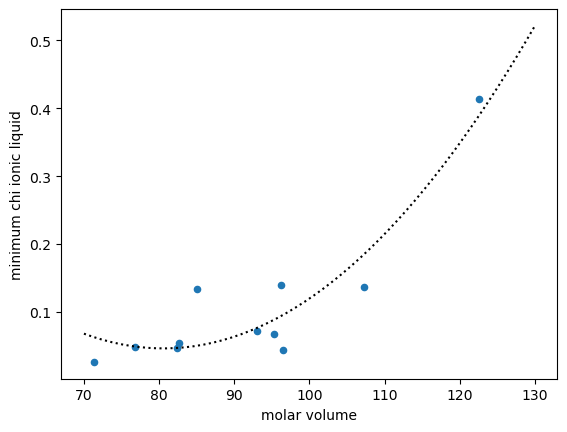

In [36]:
ax = df.plot.scatter("molar volume", "minimum chi ionic liquid")
ax.plot(xfit, yfit, linestyle=":", color="black")

### Get the R2 value and set it equal to R2Curve

In [37]:
R2curve = poly_model.score(df[["molar volume"]], df["minimum chi ionic liquid"])

### Results:

In [38]:
print("The linear fit R2 score is: {}".format(R2linear))
print("The curve fit R2 score is: {}\n".format(R2curve))
if R2linear > R2curve:
    print("The linear fit is better")
elif R2linear < R2curve:
    print("The curved fit is better")
else:
    print("You've made a mistake, probably not setting R2curve.")


The linear fit R2 score is: 0.667158778296471
The curve fit R2 score is: 0.8626575620820776

The curved fit is better


*By eye, and from the residuals, you can probably tell which fit is the better one.*

## Overfitting

Is it the case that a better $R^2$ score is always better?

There is a the concept of **overfitting** your data, which we are going to try now.

### This time, use 7 polynomial features to fit the data to a curve line and get the residuals

**Exercise: Make a polynomial model with an polynomial of order 7 and plot it with the data and set the residuals to `R2overfit`**

In [48]:
poly_7 = make_pipeline(PolynomialFeatures(7), LinearRegression())

poly_7.fit(df[["molar volume"]],df["minimum chi ionic liquid"])


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

C:\ProgramData\Anaconda3\envs\ml-for-chemists-tf2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


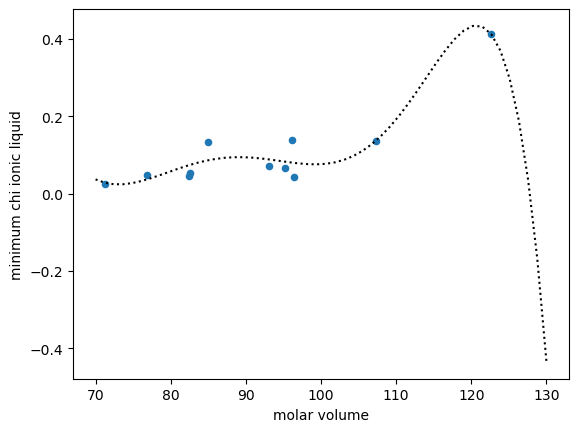

In [49]:
R2overfit = poly_7.score(df[["molar volume"]],df["minimum chi ionic liquid"])

x_fit = np.linspace(70, 130)
# predict y
y_fit = poly_7.predict(xfit[:, np.newaxis])

ax = df.plot.scatter("molar volume", "minimum chi ionic liquid")
ax.plot(x_fit, y_fit, linestyle=":", color="black")

### Results:

In [43]:
print("The linear fit R2 score is: {}".format(R2linear))
print("The curve fit R2 score is: {}".format(R2curve))
print("The curve fit R2 score is: {}".format(R2overfit))

The linear fit R2 score is: 0.667158778296471
The curve fit R2 score is: 0.8626575620820776
The curve fit R2 score is: 0.9268359712253263


**Regression Conclusion**

**Overfitting**
Look at the three graphs you've plotted, which fit seems the best? 

Just adding more features is not the best way to fit data. Generally, you want the fitting equation to be as simple as possible, but no simpler. With this data, the linear fit is the simplest, but not the most informative. The quadratic fit is a good mix of explanation (it explains 86% of the variance after all) and usefulness. The 7-featured polynomial fit is overfitting the data.

*How do we find out which fit is the best?*
One method would be to get more data, if possible, if we were to measure another co-solvent with a molar volume larger than TMU we could see if it is closer to the quadratic or linear fit. If we cannot measure more data (for example, in the chemical sciences there may not be another solvent with similar properties but a larger molar volume) then we use the **leave one out** approach, which is exactly what it sounds like, you remove one of the points and do the fits and see how well the fitted equation predicts the value you left out. 

*Is there a general rule of thumb?*
If you have a theory that is predicting something relevant about your data, then obviously fit your data to that equation. Overwise, stick with the simpler fits. Never use a fit with more features than the number of datapoints, and generally use fits with powers of less than 3 or 4. 

**Chemistry Conclusion**

In the paper [2] this data comes from the quadratic fit was plotted, as there is no theoretical reason why the fit should have that shape, this was presented as an experimental observation. However, a major factor in the quadratic fit comes down to whether TMU is part of the trend, in which case the quadratic trend is best, but if TMU is an outlier then a straight line through the remaining points would be a good fit. 

The fact that *molar volume* can be used to explain around 80% of why different co-solvents require different molar fractions of ionic liquid to start dissolving cellulose suggests that the volume of the molecules will be important in explaining this process.

In the section 4  we're going to continue with the insight that the co-solvent molar volume is important and try to explain what the co-solvents are doing.

# 3. Linear fitting exercises

**Exercise 1:**

**Paper [2] has the following theory to explain the behaviour of these OESs**

$n_{cell} = d + m \sqrt{\, n_{IL}}$

where $n_{cell}$ is the number of cellubiose residues in solution, $n_{IL}$ is the number of ionic liquid pairs in solution and $d$ and $m$ are fitting parameters. By linearising your data, can you calculate $m$ and $d$ for 1-MI, DMSO, DMAc, TMU and PC. Report the $R^2$ values. Start with the `chi_IL` and `chi_cell` data. Which co-solvents follow the theory well and which do not? 

You will need to expand the data frame and you'll need to use numpy's square root function `np.sqrt(x)` to get the $\sqrt{x}$

In [50]:
import scipy.constants
Avogadro = scipy.constants.physical_constants['Avogadro constant'][0]

Answer: by the $R^2$ values, TMU amd PC are definitely outliers, 1-MI looks like an outlier as well, by eye. DMSO and DMAc are typical, as they are well fit by a straight line. 

# 4. Multivariate Linear Regression: building models for the maximum efficiency of OES from co-solvent features.

So we've done quite a lot of single dimension linear regressions now. And we've found out that molar volume is quite important for explaining the minimum_chi_IL. Let's now try to see if we can explain the maximum efficiency of IL. 

**Mathematical background** 

So far we have been fitting single columns of **features** (X) to **targets** (y), i.e.
$$y = \beta_0 + \beta_1 X$$.

Note, the terminology here, features are the inputs (i.e. what would be plotted on the x axis) and targets are the values that would be plotted on the y axis. Before we were calling the intercept '$c$', and the gradient '$m$', generally the coefficients of a model are numbered $\beta_x$, so we've switched to that terminology: gradient = $\beta_1$ and the intercept = $\beta_0$.

In section 2 we fitted three different degrees of linear model with a single feature:
 * $y = \beta_0 + \beta_1 X$
 * $y = \beta_0 + \beta_1 X^2$
 * $y = \beta_0 + \beta_1 X^7$
 
Note that the regressions for these models are linear, but the feature X can be linear or polynomial. 
 
Now we're going to add more features.

**Multivariate linear regression**

We can generalise the equation for a single feature to many, by adding more coefficients, for example: 
$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 ...  \beta_n X_n
$$

Doing this in python is quite easy. Now our input $X$ is written as a list of columns or as a dataframe with more columns. If you were waiting for an explanation of why the input was always `df[["x"]]` and the targets `df["y"]` this is why. X can have more than one column, y is a single list of targets. So, 
`X = df[["x1"],["x2"],["x3]]`
`y = df["y"]`
Note that, most textbooks will choose a capital letter for 'X' to remind you that it can have multiple columns (i.e. be a matrix) and use a lower case `y` for the targets as this can only be a single solumn (i.e. a vector). 

Let's do a multivariate fit.

First we load in some new data:

In [ ]:
solvent_data = pd.read_csv('./tutorialdata/TutorialSolventData.csv')

Have a look at the data:

In [ ]:
solvent_data

We don't have data for all the solvents, so we'll just do this exercise on a subset. Let's also leave out one of the solvents we do have data for (the *leave one out* approach), so we can use it as **test** data later. Let's take out DMAc:
(splitting our data into a train and test set is a common way of testing our fits. Normally you would randomly pick around 20% of the data for a test set.)

In [ ]:
# This prints out the reduced list of co-solvents tested
solventrange = [0,1,2,3,5,7,8,9]
for i in solventrange:
    print(SolventNameList[i])

The target is the maximum efficiency of $\chi_{IL}$

In [ ]:
# This sets up the target vector
target=[]
for i in solventrange:
    target.append(eff["chi_IL_max_efficiency"][i])

Keys are the labels at the top of the dataframe (technically, they are the keys to the dictionary we input).

In [ ]:
solvent_data.keys()

Here we make a new `DataFrame` called `solvent_parameters` that only contains the numerical solvent parameters we want to test.

In [ ]:
solvent_parameters=pd.DataFrame({'Mw': solvent_data['Mw'], 
                                 'BP': solvent_data['BP'], 
                                'Dipole Moment': solvent_data['Dipole Moment'],
                                'Density': solvent_data['Density'],
                                'Molar Volume': solvent_data['Molar Volume']})
solvent_parameters.keys()

Let's remove the data from DMAc from the inputs as well.

In [ ]:
# drop removes line 4 from the DataFrame; iloc (index location) finds row 4 of the DataFrame
# This code makes two new DataFrames of 8 training data points and 1 test data point
train_solvent_parameters = solvent_parameters.drop(4)
test_solvent_parameters = solvent_parameters.iloc[4]

Now the input includes 5 features: 'Mw', 'BP', 'Dipole Moment', 'Density', 'Molar Volume' and to fit the model to the target, we just run LinearRegression as before, but this time on the training data.

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(train_solvent_parameters, target)

This tells us how good the fit is on the training data.

In [ ]:
model.score(train_solvent_parameters, target)

These are the coefficients for the features of the model. 

In [ ]:
model.coef_

In [ ]:
model.intercept_

This code reshapes the list into an array and then into a column (play around with it to see how it works). 

In [ ]:
test=np.array(test_solvent_parameters).reshape(1,-1)

Now, lets see how well it does on DMAc:

In [ ]:
pred = model.predict(test)[0]

This is the actual value:

In [ ]:
ground_truth = eff.iloc[4]["chi_IL_max_efficiency"]

In [ ]:
print("Predicted value: {}".format(pred))
print("Actual value: {}".format(ground_truth))
error = ground_truth-pred
print("Error: {:.2f}, Percentage error: {:.1f}%".format(error, 100*(error/ground_truth)))

So... the fitted model has a very good $R^2$ value on the training data, but isn't all that good at predicting for unseen test data. This method of leaving out data as a test set is a very importent concept in machine learning. It helps us avoid overfitting. The model is only a good model if it has a good $R^2$ (relative to the number of fitting parameters you'ved used) and it has a good accuracy on the test set. 

Let's try the model using less of the features. (Note, a line with a # at the start is a comment, so here I've commented out the DipoleMoment)

In [ ]:
solvent_parameters=pd.DataFrame({
    'Mw': solvent_data['Mw'], 
    'BP': solvent_data['BP'], 
    #'Dipole Moment': solvent_data['Dipole Moment'],
    'Density': solvent_data['Density'],
    'Molar Volume': solvent_data['Molar Volume']
})
solvent_parameters.keys()
train_solvent_parameters = solvent_parameters.drop(4)
test_solvent_parameters = solvent_parameters.iloc[4]
model = LinearRegression(fit_intercept=True)
model.fit(train_solvent_parameters, target)
print("R2 on training data: ", model.score(train_solvent_parameters, target))
print("model coefficients: ", model.coef_)
test=np.array(test_solvent_parameters).reshape(1,-1)
pred = model.predict(test)[0]
ground_truth = eff.iloc[4]["chi_IL_max_efficiency"]

print("Predicted value for test data: {}".format(pred))
print("Actual value for test data: {}".format(ground_truth))
error = ground_truth-pred
print("Test data error: {:.2f}, Percentage error: {:.1f}%".format(error, 100*(error/ground_truth)))

## Exercise 3

**Exercise 3.**

Using the code above, find out which single solvent parameter explains most the variance. Then test the 2 and 3 parameter models which include that single solvent parameter to find out which is the best on the training set and test set. You should be able to do this by just re-run this code commenting out features. Write the answer in the box below.

# 5. Multi-polynomial regression to fit the cellulose dissolution curves

In paper [2], the $\chi_{cell}$-$\chi_{IL}$ curves were fit with multi-polynomial regression. 

In section 4 the equation for multi-variate regression was given:
$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 ...  \beta_n X_n
$$

Now, if we allow the features ($\beta_n$) to raised to powers, i.e.:

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_2 + \beta_4 X_2^2 ...  \beta_n X_n
$$
Multiple prediction variables can also be included in a linear regression model allowing cross terms e.g.
$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_1 X_2^2 + \beta_4 X_2 X_1^2 + \beta_5 X_1^2 X_2^2 ...  \beta_z X_n^g X_m^h
$$

In this section you're finally going to fit some of these curves!

In [ ]:
ax=chi1MI.plot.scatter("chi_IL","chi_cell", c='r', label='1MI')
chiDMSO.plot.scatter("chi_IL","chi_cell", c='b', ax=ax, label='DMSO')
chiDMF.plot.scatter("chi_IL","chi_cell", c='tab:orange', ax=ax, label='DMF')
chiDMI.plot.scatter("chi_IL","chi_cell", c='k', ax=ax, label='DMI')
chiDMAc.plot.scatter("chi_IL","chi_cell", c='y', ax=ax, label='DMAc')
chisulfolane.plot.scatter("chi_IL","chi_cell", c='cyan', ax=ax, label='sulfolane')
chigbut.plot.scatter("chi_IL","chi_cell", c='khaki', ax=ax, label='gbut')
chigval.plot.scatter("chi_IL","chi_cell", c='g', ax=ax, label='gval')
chiTMU.plot.scatter("chi_IL","chi_cell", c='gray', ax=ax, label='TMU')
chiNMP.plot.scatter("chi_IL","chi_cell", c='purple', ax=ax, label='NMP')

In the paper, the equation was found to be of the form:
$$
\chi_{cell} = A \chi_{IL} + B (1 - \chi_{IL}) + C (\chi_{IL})^D (1 - \chi_{IL})^E - F \chi_{IL}^2
$$

Note that the molar fraction of hte co-solvent $\chi_{CS}$ is given by $\chi_{CS} =  (1 - \chi_{IL})$ so the constants tell you about the chemistry of teh system. 

## Exercise 4: 

Using the features: $\chi_{IL}$, $(1 - \chi_{IL})$ and $\chi_{IL}^2$
do a multivariate polynomial fit for DMAc. (This is fitting the data to the simplified equation $$
\chi_{cell} = A \chi_{IL} + B (1 - \chi_{IL}) + F \chi_{IL}^2
$$


Note that the molar fraction of hte co-solvent $\chi_{CS}$ is given by $\chi_{CS} =  (1 - \chi_{IL})$ so the constants tell you about the chemistry of the system. 

Hint: There are two ways that you can do this task. I suggest using polynomial features rather than assuming that one of the terms in $\chi_{IL}^2$

If you have time, try doing the 1-MI fit as well. (Plot the predicted values using plt.scatter)

# 6. Ridge regression - Fitting and plotting volume fractions

## 6.1 Plotting and fitting volume fractions

So, in section 2 we saw that the minimum $\chi_{IL}$ is related to the molar volume of the co-solvent. In section 4 we fitted a multivariate model to the maximum efficiency measure (and minimum $\chi_{IL}$) and you should have found that the solvent parameter that describes the most of the variance is the molar volume of the co-solvent. 

So... lets try plotting the $\chi_{cell}$ against the **volume fraction** of IL. We could calculate the molar volume from $\chi_{IL}$ and the molar volumes of the co-solvents and [EMim][OAC], but to make things easier the volume fraction has been calculated for you. The code below read in this data for you. 

In [ ]:
for i in range(len(SolventNameList[1:11])):
    my_string =  "vol" + SolventNameList[i] + " = pd.read_csv(\"./tutorialdata/vols" + SolventNameList[i] + ".csv\")"
    print(my_string)
    exec(my_string)

Have a quick look at the data

In [ ]:
vol1MI.head()

Now, lets plot the data

In [ ]:
ax=vol1MI.plot.scatter("vol_frac_IL","chi_cell", c='r', label='1MI')
volDMSO.plot.scatter("vol_frac_IL","chi_cell", c='b', ax=ax, label='DMSO')
volDMF.plot.scatter("vol_frac_IL","chi_cell", c='tab:orange', ax=ax, label='DMF')
volDMI.plot.scatter("vol_frac_IL","chi_cell", c='k', ax=ax, label='DMI')
volDMAc.plot.scatter("vol_frac_IL","chi_cell", c='y', ax=ax, label='DMAc')
volsulfolane.plot.scatter("vol_frac_IL","chi_cell", c='cyan', ax=ax, label='sulfolane')
volgbut.plot.scatter("vol_frac_IL","chi_cell", c='khaki', ax=ax, label='gbut')
volgval.plot.scatter("vol_frac_IL","chi_cell", c='g', ax=ax, label='gval')
volTMU.plot.scatter("vol_frac_IL","chi_cell", c='gray', ax=ax, label='TMU')
volNMP.plot.scatter("vol_frac_IL","chi_cell", c='purple', ax=ax, label='NMP')

It seems that plotting the volume fraction has more or less linearized the data. The difference between the co-solvents have more or less dissappeared, which suggests that the co-solvent volume is the main cause of the difference between the datasets, so when we include that by plotting against the volume fraction of ionic liquid (the amount of volume taken up by the IL in one mole of OES at that composition), the different OESs now overlap.

Let's see if we can fit all of this data and how good the fit is. To do this we're going to concatanate all the OES data into a single dataset using `pandas` `concat` function as below:

In [ ]:
all_data=pd.concat([vol1MI,volDMSO,volDMF,volDMI,volDMAc,volsulfolane,volgbut,volTMU])
print('There are {} datapoints in the combined dataset all_data'.format(len(all_data)))

**Exercise**: fit a straight line to these data and see what the $R^2$ value is.

You should get a very high $R^2$ value, so most of the variance in the the molar fraction of cellubiose solvated is explained by a linear relationship between volume fraction of IL. So, by playing with these fits and these data we have found out that most of the difference between different OESs is to do with the co-solvent's molar volumes, and thus we can predict which other possible solvents would be good to try.

What's the chemical reasoning for this? 

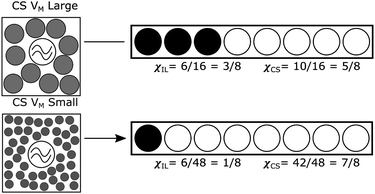

Fig. 6. Let's assume we have a small number of solvation shells of cellubiose in OES. The ionic liquid is in the solvation shell and this takes up a certain volume. Assuming a fixed volume available to the solution, fewer bulky CS are required to fill the remaining volume (10 in this example) than the smaller co-solvent (42). Therefore, for the bulky co-solvent, proportionately the ionic liquid accounts for more of the solution by mole, and thus has a larger molar fraction. As the smaller co-solvent requires more co-solvent molecules to fill the volume, the ionic liquid is a smaller fraction of the molecules in the solution, so the molar fraction is smaller.

However, in both these cases the volume fraction of the ionic liquid (the fraction of the volume taken up by IL) is the same. So, if we plot the volume fraction on the x-axis, the different between OESs dissappears. 

More or less...

**Exercise: From your work in section 1 (linearized models) or section 5, make a dataset called `typical_data` of the co-solvents that you think are $typical$ and then repeat the fitting process to find the $R^2$ value for them.**

You should get a much nicer fit, as the typical OES's behaviour are almost completely explained by the co-solvent molar volume.

## 6.2 Ridge regression: Using regularisation to guide the solver to a solution that is less effected by outliers

There is more than one way to fit a model to a set of data, and one way of guiding a model towards a solution that is useful is to use **regularisation**. 

This is basically adding an extra term to the model which penalises some solutions more than others. 

We're going to use **ridge regression** which minimises the *total error* rather than the *average error*, and this makes data more resilient to the variance in the data and avoids overfitting. In short, ridge regression uses regulariation to optimize it for **prediction**, rather than inference.

Even though the linear model may be optimal for the data given to create the model, it is not necessarily guaranteed to be the best model for predictions on unseen data

If the underlying data follows a relatively simple model, and the model we use is too complex for the task, what we are essentially doing is putting too much weight on any possible change or variance in the data. The model is over-reacting and over-compensating for even the slightest change in the data. People in the field of statistics and machine learning call this phenomenon **overfitting**. 

Standard linear regression gives you unbiased regression coefficients (maximum likelihood estimates "as observed in the data-set").
Ridge regression allows you to regularize ("shrink") coefficients. This means that the estimated coefficients are pushed towards 0, to make them work better on new data-sets ("optimized for prediction"). This allows you to use complex models and avoid over-fitting at the same time.

In this project rotatation you will be using the program **IMPRESSION** [3] to predict NMR parameters, and this program is based on **kernal ridge regression**, which is a non-linear version of ridge regression. (It's a more complicated and powerful version of ridge regression), so we're going try it out here. Note that this is a type of non-linear regression.

[3] Will Gerrard, Lars Andersen Bratholm, Martin Packer, Adrian J. Mulholland, David R. Glowacki, Craig P. Butts, 
"IMPRESSION -- Prediction of NMR Parameters for 3-dimensional chemical structures using Machine Learning with near quantum chemical accuracy", Submitted to ArXiv on 22 Aug 2019.

Abstract: The IMPRESSION (Intelligent Machine PREdiction of Shift and Scalar Information Of Nuclei) machine learning system provides an efficient and accurate route to the prediction of NMR parameters from 3-dimensional chemical structures. Here we demonstrate that machine learning predictions, trained on quantum chemical computed values for NMR parameters, are essentially as accurate but computationally much more efficient (tens of milliseconds per molecule) than quantum chemical calculations (hours/days per molecule). Training the machine learning systems on quantum chemical, rather than experimental, data circumvents the need for existence of large, structurally diverse, error-free experimental databases and makes IMPRESSION applicable to solving 3-dimensional problems such as molecular conformation and isomerism

In this section, we're going to use DMSO as an example of a typical OES, and 1-MI as an example of an aytpical OES (It is notable that this is the only cosolvent in the group with a nitrogen atom hydrogen bond acceptor (all others are oxygen atom acceptors). 

**Plot the $\chi_{cell}$ against vol_frac_IL below**

In [ ]:
ax=vol1MI.plot.scatter("vol_frac_IL", "chi_cell", c="red")
volDMSO.plot.scatter("vol_frac_IL", "chi_cell",ax=ax)

**Fit a line to the 1-MI data and assign R2linear to the R2 value. Plot 1MI and the linear fit.**

In [ ]:
# instantiate the model
newmodel = LinearRegression(fit_intercept=True)
# set up fit the model to the data
newmodel.fit(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"])
# set up x
xfitlin = np.linspace(0, 1)
# predict y
yfitlin = newmodel.predict(xfitlin[:, np.newaxis])
R2linear = newmodel.score(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"])
ax = vol1MI.plot.scatter("vol_frac_IL", "chi_cell", c="red")
ax.plot(xfitlin, yfitlin, linestyle=":", color="black")

In [ ]:
print("R2 for the linear fit is: {:.3f}".format(R2linear))

### Kernel ridge regression

The `LinearRegression` method uses **ordinary least squares** to fit a linear model, it does this by minimizing the residual sum of squares between the targets and the predictions from the model. 

`KernelRidge` regression is often used if the input data are not linearly indepedent and imposes a penalty on the size of the coefficients, this penalty is set by a parameter to `KernelRidge` called alpha. 

In [ ]:
#The code below imports the `KernalRidge` object from `sklearn`. 
from sklearn.kernel_ridge import KernelRidge
# this sets up an insantiation of a Kernal Ridge regression object and calls it clf
clf = KernelRidge(alpha=0.50)
# here do a Kernal ridge regression fit on hte data
clf.fit(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"]) 
xfitridge = np.linspace(0,1)

In [ ]:
yfitridge = clf.predict(xfitridge[:, np.newaxis])

In [ ]:
ax = vol1MI.plot.scatter("vol_frac_IL", "chi_cell", c='red')
ax.plot(xfitridge, yfitridge, linestyle=":", color="black")

In [ ]:
R2Ridge = clf.score(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"])
print("R2 for the kernel ridge regression fit is: {:.3f}".format(R2Ridge))
print("R2 for the linear fit is: {:.3f}".format(R2linear))

OK, now we've fitted both models to the atypical data 1-MI, lets see how what those fits would predict for DMSO (remembering that we've now plotted the volume fraction of ionic liquid so there should be no difference between OESs, if the molar volume explains everything about the dataset). The code below plots both fits against the DMSO data. **Important: we've not fitted the lines to this data, this is a prediction from the 1-MI data to the DMSO data**

In [ ]:
ax = volDMSO.plot.scatter("vol_frac_IL", "chi_cell")
ax.plot(xfitlin, yfitlin, linestyle=":", color="black")
ax.plot(xfitridge, yfitridge, linestyle=":", color="red")
print('Black: linear regression; Red: kernel ridge regression')

In [ ]:
# This prints out the results nicely
print("Co-solvent \tLinear\tRidge")

print("1-MI (fit)     \t{:.2f},\t {:.2f}\t".format(
    newmodel.score(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"]),
    clf.score(vol1MI[["vol_frac_IL"]], vol1MI["chi_cell"])))

print("DMSO (predict) \t{:.2f},\t {:.2f}\t".format(
    newmodel.score(volDMSO[["vol_frac_IL"]], volDMSO["chi_cell"]),
    clf.score(volDMSO[["vol_frac_IL"]], volDMSO["chi_cell"])))


So, by using regularisation, we can get a decent set of fits to the typical data from the atypical data. This is because this method is less sensitive to outliers (and the outliers are what makes the datasets atypical).  

### Exercise
Based on the code above, you should try the reverse, and fit both a linear and kernel ridge regression to the DMSO data and what it predicts for the 1-MI. 

As the DMSO data is a typical dataset, with no real outliers, there is no difference between the linear and ridge fits. 

# Phew!

Well done if you've got to this bit.

To recap you've learned:
* how to do a simple linear regression 
* how to put polynomial features into a linear regression
* how to do multi-variate regression
* how to do multi-variate polynomial regression
* how to do a nonlinear regression, specifically kernal ridge regression

And you've repeated the data analysis for a recently published paper. 

Well done!

The next notebook is Introduction to Machine Learning 1: K means.